# 0. import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. read data

In [2]:
df = pd.read_csv("mtcars.csv", delimiter=",", header=0)

# 2. simple analysis

In [3]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
print("# of data: ", df.shape[0])

# of data:  32


In [6]:
df.rename(columns={"Unnamed: 0": "model"}, inplace=True)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [9]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [10]:
 print("gear 값의 종류",len(df["gear"].unique()))
 print("transmission 값의 종류",len(df["am"].unique()))

gear 값의 종류 3
transmission 값의 종류 2


# 3. Gear x Transmission

In [11]:
# with corsstab
pd.crosstab(index=[df.gear], columns=df.am)

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [12]:
# without crosstab
gear_trasmission_df = df[["gear", "am"]]
gear_trasmission_df.value_counts()

gear  am
3     0     15
4     1      8
5     1      5
4     0      4
Name: count, dtype: int64

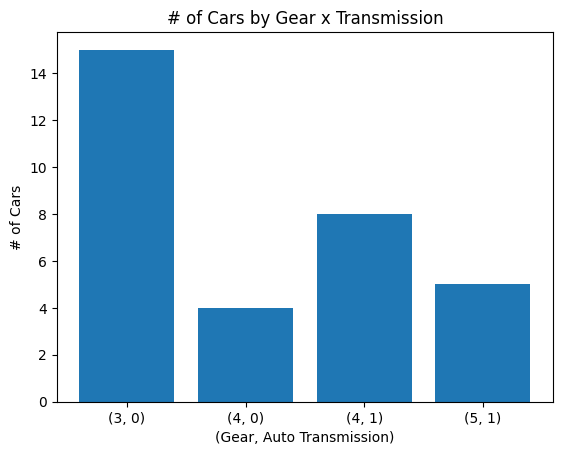

In [13]:
gear_am_counts = gear_trasmission_df.groupby(['gear', 'am']).size().reset_index(name='count')
gear_am_counts['gear_am'] = gear_am_counts.apply(lambda row: f"({row['gear']}, {row['am']})", axis=1)

plt.bar(x=gear_am_counts['gear_am'], height=gear_am_counts['count'])
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.show()

# 4. Every Features

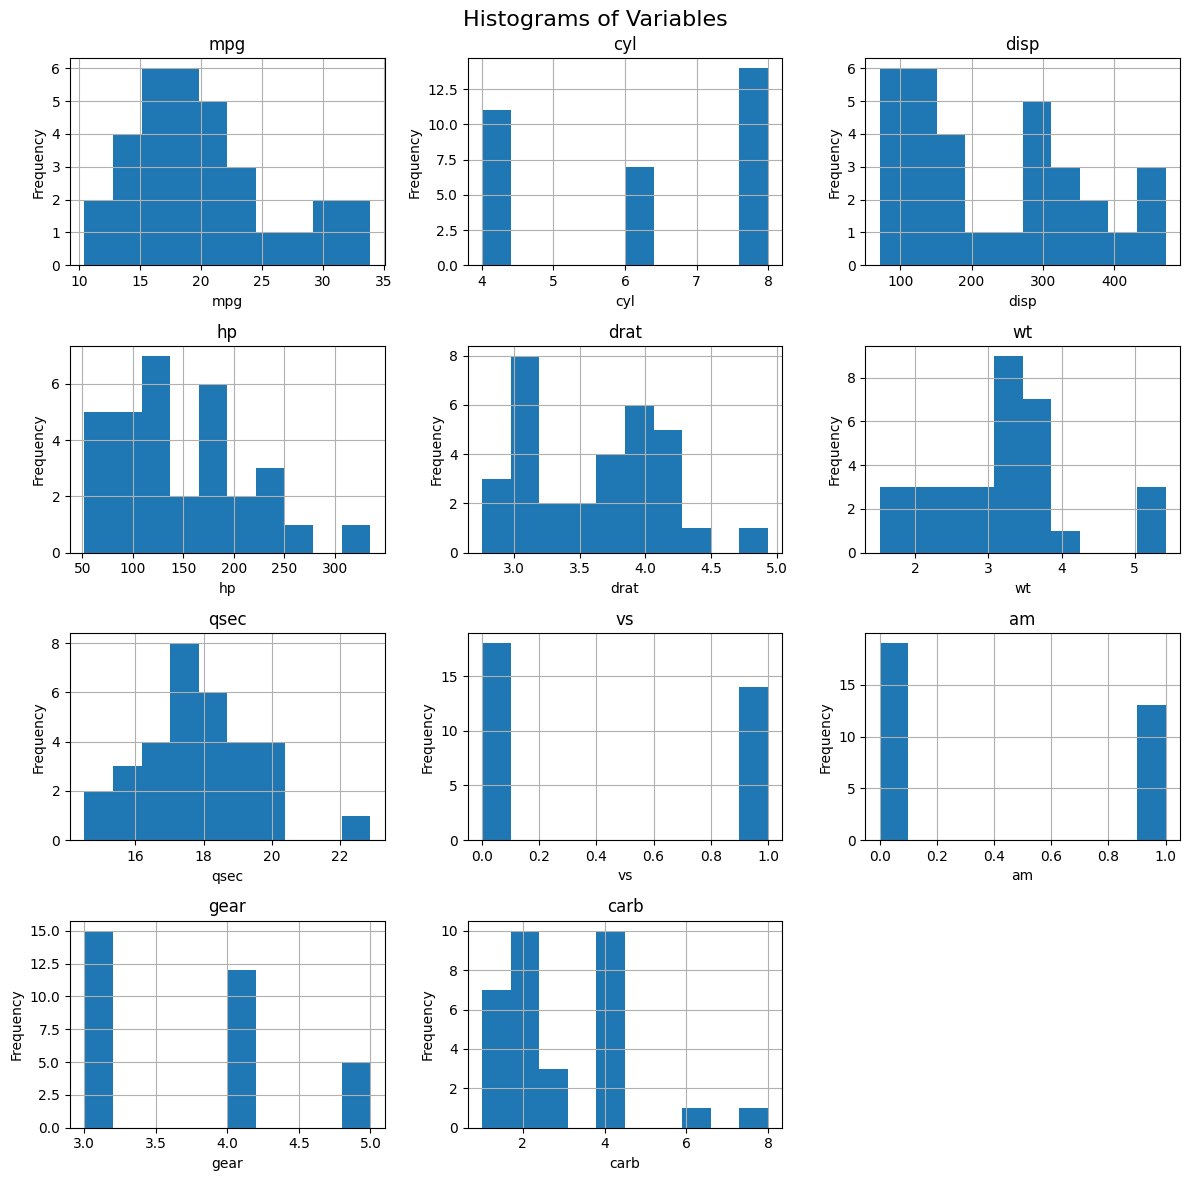

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
fig.suptitle('Histograms of Variables', fontsize=16)

axes = axes.flatten()

for i, column in enumerate(df.columns[1:]):
    axes[i].hist(df[column].values)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 5. Cylinder vs Horse Power

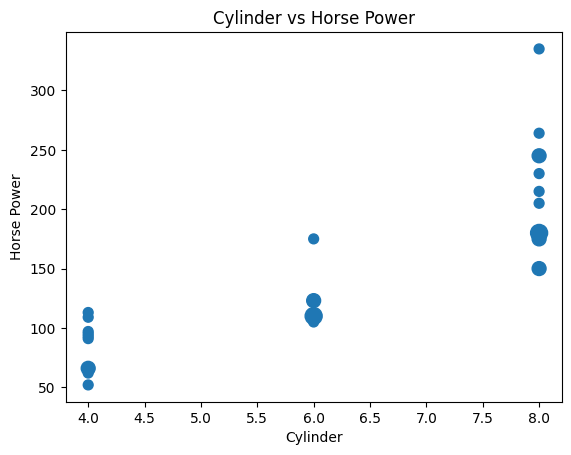

In [15]:
cyl_hp_df = df[['cyl', 'hp']]
cyl_hp_df = cyl_hp_df.groupby(['cyl', 'hp']).size().reset_index(name='count')

plt.scatter(x=cyl_hp_df['cyl'], y=cyl_hp_df['hp'], s=cyl_hp_df['count']*50)
plt.title('Cylinder vs Horse Power')
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.show()

# 6. MPG vs Horse Power

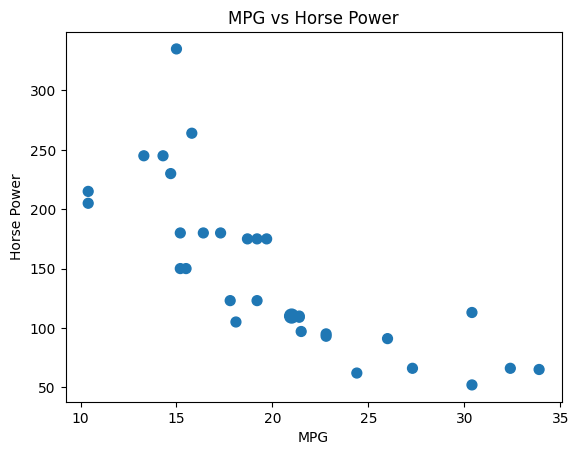

In [16]:
mpg_hp_df = df[['mpg', 'hp']]
mpg_hp_df = mpg_hp_df.groupby(['mpg', 'hp']).size().reset_index(name='count')

plt.scatter(x=mpg_hp_df['mpg'], y=mpg_hp_df['hp'], s=mpg_hp_df['count']*50)
plt.title('MPG vs Horse Power')
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.show()

# 7. Correlation

In [17]:
without_model_df = df.drop(columns=['model'])
without_model_df_corr = without_model_df.corr(method='pearson')
without_model_df_corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<Axes: >

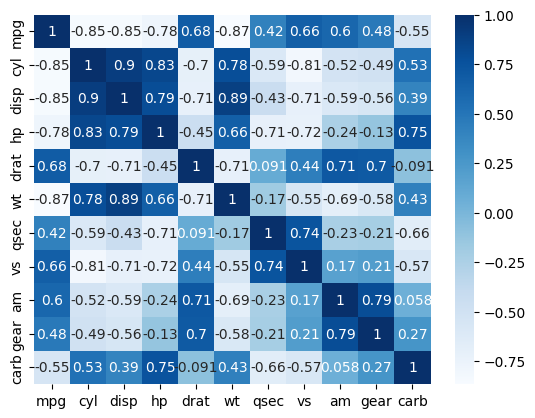

In [18]:
sns.heatmap(without_model_df_corr, cmap="Blues", annot=True)

# 8. Data Analysis

model: car model, 차 기종  
mpg: Miles/(US) gallon, 연비  
cyl: Number of cylinders, 기통 (ex, 8기통), 실린더의 수가 많으면 배기량도 많아지고 차의 출력도 좋아진다.  
disp: Displacement (cu.in.), 배기량, 엔진이 한 번에 소비할 수 있는 연료의 양    
hp: Gross horsepower, 최대 출력 마력, 마력이 높으면 더욱 빠른 속도로 달릴 수 있다    
drat: Rear axle ratio, 후륜 비율  
wt: Weight (lb/1000), 자동차의 무게  
qsec: ¼ mile time, 1/4 마일 동안 가속 시간  
vs: V/S, V/S 엔진 유형 (V 엔진: 0, S 엔진: 1)  
am: Transmission (0 = automatic, 1 = manual), 변속기 유형 (자동: 0, 수동: 1)  
gear = Number of forward gears, 전진 기어 수  
carb = Number of carburetors, 기화기 수  

## 경제적 가치
- mpg 값 분석으로, 연비가 좋은 차를 선택할 수 있다. 이를 통해 비용 측면에서 경제적 가치를 얻을 수 있다.
- cyl(기통 수), disp(배기량), hp(마력) 값 분석으로 유지 비용과 감가를 예측할 수 있다. 이를 통해 적절한 차량 구매와 교체 시기를 결정해 경제적 가치를 얻을 수 있다.
- mpg 및 연료와 연관된 값 분석으로 각각의 차의 환경적 영향력을 평가할 수 있다.

## 비즈니스 상황
- 차량 판매 및 마케팅 상황에서 사용할 수 있다.
- 정부의 환경 오염 관련된 정책 상황에서 자동차 제조기업이 사용할 수 있다.

In [32]:
correlation_matrix = df.drop(columns=['model']).corr()

highly_correlated_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]  # Removing self-correlations

top_pairs = highly_correlated_pairs
top_pairs = top_pairs.index.tolist()

In [25]:
highly_correlated_pairs

cyl   disp    0.902033
disp  cyl     0.902033
wt    disp    0.887980
disp  wt      0.887980
mpg   wt      0.867659
                ...   
drat  qsec    0.091205
carb  drat    0.090790
drat  carb    0.090790
carb  am      0.057534
am    carb    0.057534
Length: 110, dtype: float64

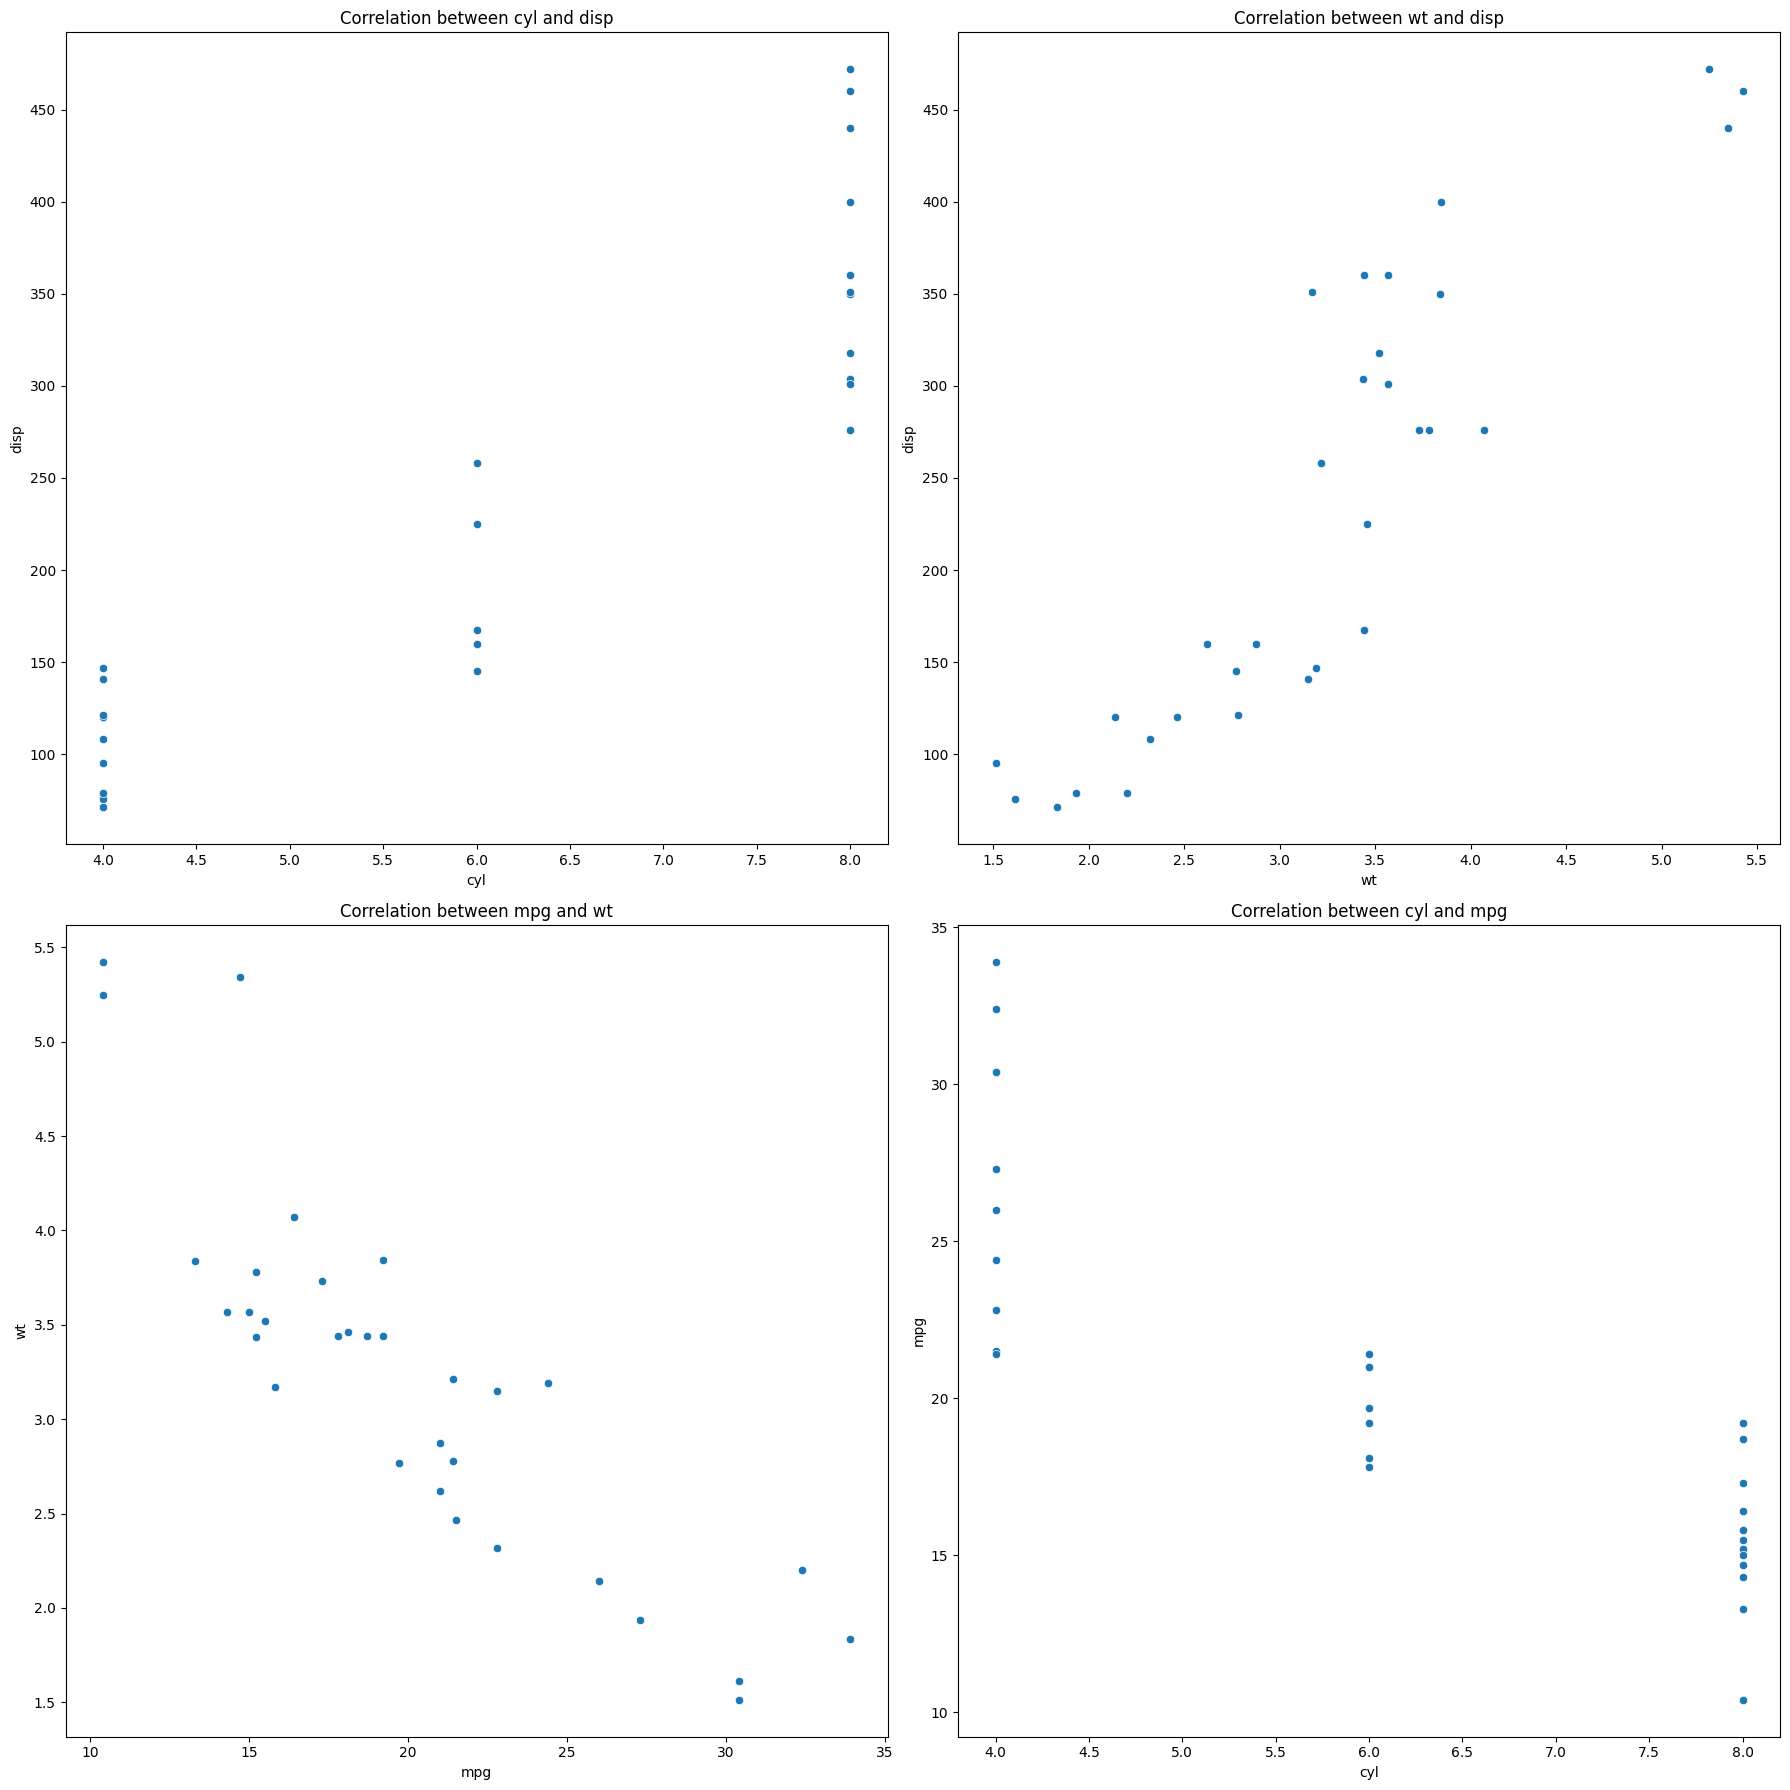

In [36]:
# Extracting the pairs
pair1 = top_pairs[0]
pair2 = top_pairs[2]
pair3 = top_pairs[4]
pair4 = top_pairs[6]

# Plotting the correlations
plt.figure(figsize=(18, 18))

# Plot for the first pair
plt.subplot(2, 2, 1)
sns.scatterplot(x=df[pair1[0]], y=df[pair1[1]])
plt.title(f"Correlation between {pair1[0]} and {pair1[1]}")
plt.xlabel(pair1[0])
plt.ylabel(pair1[1])

# Plot for the second pair
plt.subplot(2, 2, 2)
sns.scatterplot(x=df[pair2[0]], y=df[pair2[1]])
plt.title(f"Correlation between {pair2[0]} and {pair2[1]}")
plt.xlabel(pair2[0])
plt.ylabel(pair2[1])

plt.subplot(2, 2, 3)
sns.scatterplot(x=df[pair3[0]], y=df[pair3[1]])
plt.title(f"Correlation between {pair3[0]} and {pair3[1]}")
plt.xlabel(pair3[0])
plt.ylabel(pair3[1])

plt.subplot(2, 2, 4)
sns.scatterplot(x=df[pair4[0]], y=df[pair4[1]])
plt.title(f"Correlation between {pair4[0]} and {pair4[1]}")
plt.xlabel(pair4[0])
plt.ylabel(pair4[1])

plt.tight_layout()
plt.show()

- 실린더가 많을수록, 배기량이 높아진다.
- 무게가 무거워질수록, 배기량이 높아진다. 반대로 생각하면 배기량을 높이면, 무게가 무거워진다.
- 마력과 무게는 반비례 관계를 가진다.
- 마력과 실린더 수는 반비례 관계를 가진다.